In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares

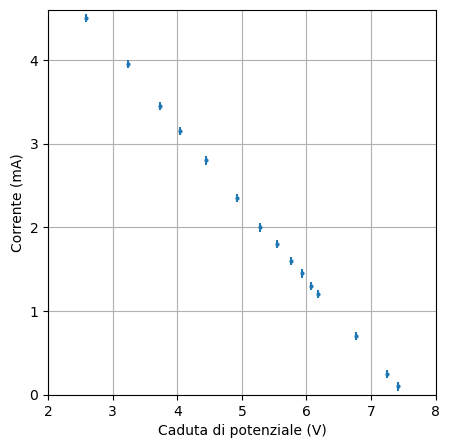

In [50]:
#Dati e andamento dei punti sperimentali

errV = 0.001 #Volt
R = np.array([500, 750, 1000, 1200, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 10000, 30000, 50000]) #Ohm
V = np.array([2.579, 3.229, 3.725, 4.049, 4.439, 4.924, 5.277, 5.545, 5.755, 5.924, 6.064, 6.180, 6.770, 7.240, 7.420]) #Volt
I = np.array([4.50, 3.95, 3.45, 3.15, 2.80, 2.35, 2.00, 1.80, 1.60, 1.45, 1.30, 1.20, 0.70, 0.25, 0.10]) #milliAmpere
errI = np.array([0.05 for i in range(len(I))]) #milliAmpere
plt.figure(figsize = (5,5))
plt.errorbar(V, I, yerr = errI, fmt = 'o', markersize = 2)
plt.xlabel("Caduta di potenziale (V)")
plt.ylabel("Corrente (mA)")
plt.xlim(2,8)
plt.ylim(0,4.6)
plt.grid(1)

In [52]:
#Definizione della funzione di fit

def par(V, a, b):
    return V*a + b
least_squares = LeastSquares(V, I, errI, par)
m = Minuit(least_squares, a = 0.794, b = 5.95) #inserire come valori di a e b quelli attesi
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.023 (χ²/ndof = 0.2)      │              Nfcn = 63               │
│ EDM = 4.41e-19 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -0.913   │   0.009   │   -0.009   │   0.009    │         │         │       │
│ 1 │ b    │   6.86    │   0.05    │   -0.05    │    0.05    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.009   │   0.009   │   -0.05   │   0.05    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │ 8.61e-05 -0.45e-3 │
│ b │ -0.45e-3  0.00256 │
└───┴───────────────────┘

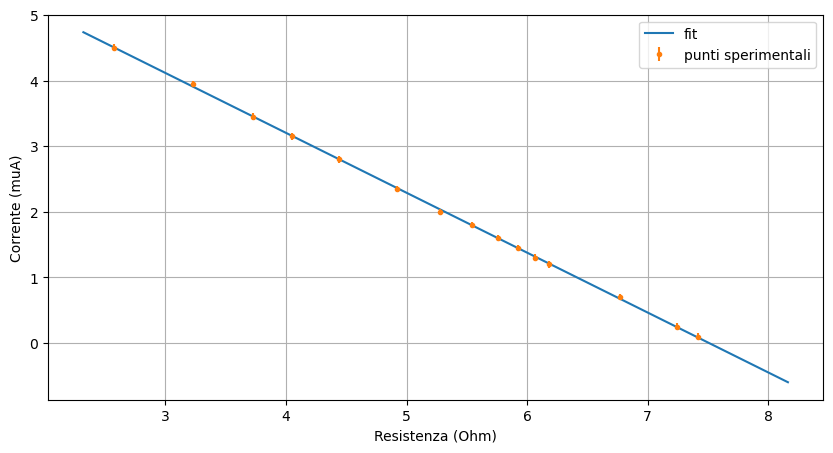

In [83]:
#Grafico del fit 

figm, axm = plt.subplots(figsize = (10, 5))
x = np.array([V[0]*0.9,V[-1]*1.1])
axm.plot(x, par(x,a,b), label = "fit")
axm.errorbar(V, I, fmt = 'o', markersize = 3, yerr=errI, label = "punti sperimentali")
axm.set_ylabel("Corrente (mA)")
axm.set_xlabel("Resistenza (Ohm)")
axm.legend()
axm.grid(1)




In [90]:
#Calcolo di Vth e Rth

Rth = -1/a
erra = m.errors["a"]
errRth = erra/a**2
Vth = -b/a
errb = m.errors["b"]
covab = m.covariance['a', 'b']
pp = (1/a**2)*(errb**2)
sp = (b**2/a**4)*(erra**2)
tp = -2*(b/a**3)
errVth = (pp+sp+tp*covab)**(0.5)
print(f"Rth = {Rth} +/- {errRth} KOhm")
print(f"Vth = {Vth} +/- {errVth} Volt")


Rth = 1.0954149294784035 +/- 0.011132371595478094 KOhm
Vth = 7.509313122801779 +/- 0.026753220542696847 Volt
